In [ ]:
# to connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option("display.float_format", "{:,.0f}".format)


In [ ]:
path= "/content/drive/MyDrive/GA/Capstone_Project/scrapping/buy.csv"
buy= pd.read_csv(path)


path= "/content/drive/MyDrive/GA/Capstone_Project/scrapping/rent.csv"
rent= pd.read_csv(path)

In [ ]:
print(rent.shape)
print(buy.shape)

(14105, 16)
(7458, 16)


**Price Column**

In [ ]:
# Price
print(f"Buy: \n {buy.Price.sample(10)}\n")
print(f"Rent: \n {rent.Price.sample(10)}\n")


Buy: 
 6055    BHD195,000
2290     BHD82,000
4446    BHD122,000
4863     BHD60,000
4155     BHD59,000
4654    BHD343,000
3760     BHD57,500
3518    BHD435,000
2736     BHD78,000
5889    BHD120,000
Name: Price, dtype: object

Rent: 
 13000      BHD450/month
10425      BHD320/month
2317     BHD1,100/month
4746       BHD380/month
16         BHD360/month
6774       BHD300/month
11086      BHD800/month
3100       BHD600/month
7186       BHD270/month
719        BHD350/month
Name: Price, dtype: object



In [ ]:

buy["Price"] = (
    buy["Price"]
    .str.replace("BHD", "", regex=False)   # remove currency
    .str.replace(",", "", regex=False)     # remove commas
    .str.strip()                           # remove spaces/tabs
    .astype(float)                         # convert to numeric
)


rent["Price"] = (
    rent["Price"]
    .str.replace("BHD", "", regex=False)     # remove 'BHD'
    .str.replace("/month", "", regex=False)  # remove '/month'
    .str.replace(",", "", regex=False)       # remove commas
    .str.strip()                             # remove spaces/tabs
    .astype(float)                           # convert to numeric
)

In [ ]:
# Price
print(f"Buy: \n {buy.Price.sample(10)}\n")
print(f"Rent: \n {rent.Price.sample(10)}\n")

Buy: 
 4392   125,000
1409   160,000
4096   115,000
3602    73,000
2983   165,000
1981   136,000
2641   305,476
5703   100,725
5844   145,000
4296   179,000
Name: Price, dtype: float64

Rent: 
 6391      380
3634    1,400
8525      650
5036      704
9498      600
2557      450
12400     550
2410    1,800
13110   1,300
7171      475
Name: Price, dtype: float64



**Property_id column**

In [ ]:
# Get number of rows in rent
n_rent = len(rent)   # 14105
# Shift buy Property_id so it starts after rent
buy["Property_id"] = buy["Property_id"] + n_rent

**Combine rent and buy**

In [ ]:
combined = pd.concat([buy, rent], ignore_index=True)

**Beds Column**

In [ ]:
# Beds
print(f"{combined.Beds.unique()}\n")


['2' '3' '5' 'studio' '3+ Maid' '4' '5+ Maid' '1' '4+ Maid' '2+ Maid' '0'
 '7++ Maid' '7+ Maid' '6+ Maid' '7' '6' 'studio+ Maid' '7+' '1+ Maid']



In [ ]:
import re
import numpy as np
import pandas as pd

def beds_to_num(x):
    if pd.isna(x):
        return np.nan

    s = str(x).strip().lower().replace(" ", "")  # normalize input
    has_maid = "maid" in s

    # base bedrooms
    if "studio" in s:
        base = 1
    else:
        m = re.search(r"(\d+)", s)  # extract first number
        base = int(m.group(1)) if m else np.nan

    # add 1 if maid room is mentioned
    return base + (1 if has_maid else 0) if not pd.isna(base) else np.nan

# Apply function on the combined rent+buy dataframe
combined["Beds"] = combined["Beds"].apply(beds_to_num).astype("Int64")




In [ ]:
# Beds
print(f"{combined.Beds.unique()}\n")


<IntegerArray>
[2, 3, 5, 1, 4, 6, 0, 8, 7]
Length: 9, dtype: Int64



**Baths Column**

In [ ]:
# Baths
print(f"{combined.Baths.unique()}\n")


combined[combined["Baths"].str.lower().eq("none")]

['3' '5' '1' '2' '7' '6' '4' '0' '7+' 'none']



,Property_id,Offer,URL,Property_type,Price,Include_w_e,Title,Area,Governorate,Beds,Baths,Size,Availability_date,Agent_name,Agency,Amenities
1276,15382,Buy,https://www.propertyfinder.bh/en/plp/buy/apart...,Apartment,"36,000",Exclusive,For Sale Furnished Sea View Studio in Al-Sayah,Busaiteen,Muharraq Governorate,1,none,431 sqft / 40 sqm,7 Sep 2025,Ali Almalek,Best Spot Real Estate,13
1322,15428,Buy,https://www.propertyfinder.bh/en/plp/buy/land-...,Land,"140,000",Exclusive,RA Land | Easy Access to Essential Services,A'Ali,Central Governorate,0,none,"5,737 sqft / 533 sqm",23 Aug 2025,Khalil Aryan,Underhill Real Estate,NaN
2688,16794,Buy,https://www.propertyfinder.bh/en/plp/buy/whole...,Whole Building,650,Exclusive,Hot Offer / Good Income / 5 years Contract,Al Juffair,Capital Governorate,1,none,"5,070 sqft / 471 sqm",NaN,Tareq Abdulameer Abdulla Almahoozi,Dream Land Real Estate,1
3459,17565,Buy,https://www.propertyfinder.bh/en/plp/buy/whole...,Whole Building,"60,000",Exclusive,Great ROI | Prime Location | 3 Flats,Manama,Capital Governorate,1,none,732 sqft / 68 sqm,26 Jun 2025,Ammar Zekrait,DAMAC REALESTATE ESTABLISHMENT,1
3472,17578,Buy,https://www.propertyfinder.bh/en/plp/buy/whole...,Whole Building,"300,000",Exclusive,Near alheli market | high return on investment,Tubli,Central Governorate,1,none,"5,220 sqft / 485 sqm",26 Jun 2025,Ammar Zekrait,DAMAC REALESTATE ESTABLISHMENT,1
3602,17708,Buy,https://www.propertyfinder.bh/en/plp/buy/land-...,Land,"73,000",Exclusive,SPECIAL LAND FOR SALE IN QUITE PLACE,Askar,Southern Governorate,0,none,"3,229 sqft / 300 sqm",NaN,Ali Khudhair,Grnata,NaN
3670,17776,Buy,https://www.propertyfinder.bh/en/plp/buy/land-...,Land,"76,000",Exclusive,Land for sale in Sanabis 212 sqm,"Sanabis, Manama",Capital Governorate,0,none,"2,282 sqft / 212 sqm",NaN,Sayed Mohamed Adnan,Grnata,NaN
3702,17808,Buy,https://www.propertyfinder.bh/en/plp/buy/land-...,Land,"84,000",Exclusive,A LAND BEST PLACE FOR SALE,Dumistan,Northern Governorate,0,none,"2,939 sqft / 273 sqm",NaN,Manar Jasim,Grnata,NaN
3712,17818,Buy,https://www.propertyfinder.bh/en/plp/buy/land-...,Land,"100,734",Exclusive,A LAND IN HIDD. BEST PLACE FOR SALE,Hidd,Muharraq Governorate,0,none,"3,950 sqft / 367 sqm",NaN,Manar Jasim,Grnata,NaN
4009,18115,Buy,https://www.propertyfinder.bh/en/plp/buy/apart...,Apartment,"32,000",Exclusive,GREAT DEAL | NEAR KING HAMAD HOSPITAL,Busaiteen,Muharraq Governorate,1,none,431 sqft / 40 sqm,29 May 2025,Anil Kumar,Pegasus Real Estate,12


In [ ]:
combined.loc[
    (combined["Baths"] == "none") & ((combined["Property_type"].str.lower() == "land") | (combined["Property_type"].str.lower() == "compound") ),
    "Baths"
] = "0"

combined.loc[
    (combined["Baths"] == "none") & (combined["Property_type"].str.lower() == "apartment"),
    "Baths"
] = "1"

combined["Baths"] = combined["Baths"].replace("none", "")

print(f"{combined.Baths.unique()}\n")
combined[combined["Baths"].str.lower().eq("")]


['3' '5' '1' '2' '7' '6' '4' '0' '7+' '']



,Property_id,Offer,URL,Property_type,Price,Include_w_e,Title,Area,Governorate,Beds,Baths,Size,Availability_date,Agent_name,Agency,Amenities
2688,16794,Buy,https://www.propertyfinder.bh/en/plp/buy/whole...,Whole Building,650,Exclusive,Hot Offer / Good Income / 5 years Contract,Al Juffair,Capital Governorate,1,,"5,070 sqft / 471 sqm",NaN,Tareq Abdulameer Abdulla Almahoozi,Dream Land Real Estate,1
3459,17565,Buy,https://www.propertyfinder.bh/en/plp/buy/whole...,Whole Building,"60,000",Exclusive,Great ROI | Prime Location | 3 Flats,Manama,Capital Governorate,1,,732 sqft / 68 sqm,26 Jun 2025,Ammar Zekrait,DAMAC REALESTATE ESTABLISHMENT,1
3472,17578,Buy,https://www.propertyfinder.bh/en/plp/buy/whole...,Whole Building,"300,000",Exclusive,Near alheli market | high return on investment,Tubli,Central Governorate,1,,"5,220 sqft / 485 sqm",26 Jun 2025,Ammar Zekrait,DAMAC REALESTATE ESTABLISHMENT,1
6739,20845,Buy,https://www.propertyfinder.bh/en/plp/buy/whole...,Whole Building,"850,000",Exclusive,New Building for Sale at Seef Area!,Seef,Capital Governorate,1,,"4,908 sqft / 456 sqm",NaN,Maytham Alhayki,Maytham Alhayki Real Estate,9
21484,14027,Rent,https://www.propertyfinder.bh/en/plp/rent/whol...,Whole Building,700,Exclusive,New staff accommodation for rent oppsite Ikea,Salmabad,Central Governorate,1,,"2,691 sqft / 250 sqm",NaN,Salman Ahmed,Burooj Alsama,NaN


**Governorate Column**

In [ ]:
print(f"Before handling nulls: {combined.Governorate.unique()}\n")
combined = combined.dropna(subset=["Governorate"])

print(f"After handling nulls: {combined.Governorate.unique()}\n")

Before handling nulls: ['Muharraq Governorate' 'Capital Governorate' 'Northern Governorate'
 'Southern Governorate' 'Central Governorate']

After handling nulls: ['Muharraq Governorate' 'Capital Governorate' 'Northern Governorate'
 'Southern Governorate' 'Central Governorate']



**Size column**

In [ ]:
combined["Size_sqft"] = combined["Size"].str.extract(r'([\d,]+)\s*sqft')
combined["Size_sqm"] = combined["Size"].str.extract(r'([\d,]+)\s*sqm')

# Remove commas and convert to numeric
combined["Size_sqft"] = combined["Size_sqft"].str.replace(",", "", regex=True).astype("float")
combined["Size_sqm"]  = combined["Size_sqm"].str.replace(",", "", regex=True).astype("float")

combined = combined.drop(columns=["Size"])

print(combined[[ "Size_sqft", "Size_sqm"]].sample(10))


       Size_sqft  Size_sqm
13262      4,413       410
13787        753        70
8047       2,153       200
14019      1,292       120
4516       1,023        95
11523        474        44
5851       2,368       220
14031      1,399       130
7467       1,615       150
21352      6,458       600


**Include_w_e Column**

In [ ]:
combined.Include_w_e.unique()

combined["Include_w_e"] = combined["Include_w_e"].map({
    "Exclusive": 0,
    "Inclusive": 1
}).astype("Int64")

In [ ]:
combined.sample(10)

,Property_id,Offer,URL,Property_type,Price,Include_w_e,Title,Area,Governorate,Beds,Baths,Availability_date,Agent_name,Agency,Amenities,Size_sqft,Size_sqm
16224,8767,Rent,https://www.propertyfinder.bh/en/plp/rent/vill...,Villa,650,0,Modern Furnished 2BR Villa+Pool/Garden/EWA/Juf...,Al Juffair,Capital Governorate,2,2,10 Jul 2025,Aby N,4You Properties,8,"1,399",130
15570,8113,Rent,https://www.propertyfinder.bh/en/plp/rent/comp...,Compound,950,1,TOWNHOUSE WITH EWA FULLY AND SEMI FURNISHED,Hamala,Northern Governorate,5,3,24 Jul 2025,Aysha Adil,301 REALESTATE,12,"4,306",400
9901,2444,Rent,https://www.propertyfinder.bh/en/plp/rent/apar...,Apartment,400,1,INCLUSIVE | INTERNET | BALCONY,Seef,Capital Governorate,1,2,15 Sep 2025,Mohamed Ali,HOUSE 2 HOME W.L.L,18,818,76
13122,5665,Rent,https://www.propertyfinder.bh/en/plp/rent/vill...,Villa,"1,500",0,NEWLY RENOVATED | 4BHK VILLA | PRIME LOCATION,Al Jasra,Northern Governorate,5,5,24 Aug 2025,Rolin Faouri,Instant Homz,15,"6,997",650
7983,526,Rent,https://www.propertyfinder.bh/en/plp/rent/apar...,Apartment,260,0,COZY | FULLY FURNISHED | MODERN &amp; SECURE,Saar,Northern Governorate,1,1,26 Sep 2025,Ahmed Shaikh,Riffa Fort Real Estate Office,3,"1,938",180
20015,12558,Rent,https://www.propertyfinder.bh/en/plp/rent/apar...,Apartment,280,0,2BHK Neat and Clean Semi Furnished Flat | Affo...,Busaiteen,Muharraq Governorate,2,2,18 Dec 2024,Dhurgham Ali,AYS Real Estate,1,"1,453",135
3538,17644,Buy,https://www.propertyfinder.bh/en/plp/buy/apart...,Apartment,"63,000",0,Freehold - Sea and Marina View - Top Quality,"Durrat Marina, Durrat Al Bahrain",Southern Governorate,1,2,22 Jun 2025,Underhill Real Estate 2,Underhill Real Estate,11,"1,184",110
12767,5310,Rent,https://www.propertyfinder.bh/en/plp/rent/apar...,Apartment,550,0,Amazing Sea View Apartment with Beach Access,"Marassi Shores Residences, Diyar Al Muharraq",Muharraq Governorate,2,2,28 Aug 2025,Siwar Arfaoui,Agate Real Estate,17,"1,076",100
8911,1454,Rent,https://www.propertyfinder.bh/en/plp/rent/apar...,Apartment,400,1,Brand new | Balcony| Dishwasher |wifi |cozy|Br...,Al Juffair,Capital Governorate,1,2,30 Mar 2025,Ernest Gnanadas,Deccan Real Estate,16,915,85
16205,8748,Rent,https://www.propertyfinder.bh/en/plp/rent/comp...,Compound,"1,200",1,ELEGANT COMPOUND VILLA WITH PRIVATE POOL,Saar,Northern Governorate,6,5,11 Jul 2025,Aysha Adil,301 REALESTATE,16,"5,382",500


In [ ]:
combined.to_csv('/content/drive/MyDrive/GA/Capstone_Project/scrapping/Property_Finder.csv', index=False)

In [ ]:
combined.to_excel(
    '/content/drive/MyDrive/GA/Capstone_Project/scrapping/Properties_data.xlsx',
    index=False
)

## **Price of sales properties**

In [ ]:
buy.Price.describe()

,Price
count,"7,458"
mean,"494,040"
std,"9,883,642"
min,1
25%,"76,746"
50%,"116,948"
75%,"179,000"
max,"517,572,947"


## **Price of Rent properties**

In [ ]:
rent.Price.describe()

,Price
count,"14,102"
mean,695
std,"4,725"
min,50
25%,330
50%,450
75%,700
max,"400,000"


In [ ]:
combined.Area.unique()

array(['Marassi Al Bahrain, Diyar Al Muharraq', 'Seef', 'Hidd',
       'Sanabis, Manama', 'Amwaj Beachfront, Amwaj Islands', 'Hamad Town',
       'Amwaj Avenue, Amwaj Islands', 'West Riffa, Riffa', 'Reef Island',
       'The Treasure, Dilmunia Island', 'Saar', 'Al Juffair',
       'North Riffa, Riffa', 'Deerat Al Oyoun, Diyar Al Muharraq',
       'Marassi Residences, Diyar Al Muharraq',
       'Al Naseem, Diyar Al Muharraq', 'Riffa Al Sharqi, Riffa',
       'The Lagoon, Amwaj Islands', 'Saraya 2, Bu Quwah',
       'Madaen, Diyar Al Muharraq', 'Tubli', 'Al Jasra',
       'Al Burhama, Manama', 'Shakhura', 'Janabiya', 'Sanad', 'Hamala',
       'Bu Quwah', 'Dumistan', 'Bu Kowarah, Riffa', 'Maqabah',
       'Marassi Shores Residences, Diyar Al Muharraq',
       'Diyar Al Muharraq', 'Isa Town', 'Arad', 'Sadad',
       'Water Garden City, Manama', 'Dilmunia Island',
       'Durrat Marina, Durrat Al Bahrain', 'Budaiya',
       'Amwaj Marina, Amwaj Islands', 'Askar',
       'Marassi Boulevard, 

In [ ]:
combined.Governorate.unique()

array(['Muharraq Governorate', 'Capital Governorate',
       'Northern Governorate', 'Southern Governorate',
       'Central Governorate', nan], dtype=object)

In [ ]:
buy.groupby("Governorate").size().reset_index(name="Count")

,Governorate,Count
0,Capital Governorate,1630
1,Central Governorate,652
2,Muharraq Governorate,2513
3,Northern Governorate,2092
4,Southern Governorate,571


from matplotlib import pyplot as plt
_df_0['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Governorate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Governorate'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Count', y='Governorate', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

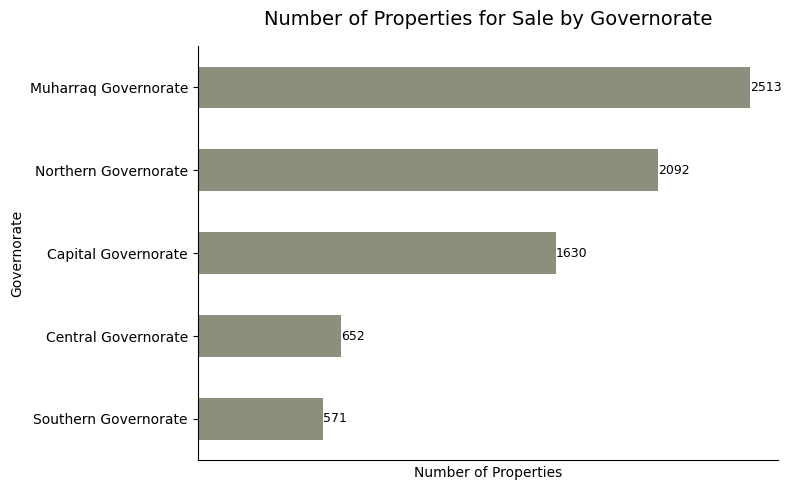

In [ ]:
import matplotlib.pyplot as plt

# Group and sort
gov_counts = buy.groupby('Governorate').size().sort_values(ascending=True)

# Plot (all same color, e.g. blue)
ax = gov_counts.plot(
    kind='barh',
    figsize=(8,5),
    color='#8c8f7b'   # pick any hex or named color
)

# Title
ax.set_title("Number of Properties for Sale by Governorate", fontsize=14, pad=15)

# Axis labels
ax.set_xlabel("Number of Properties")
ax.set_ylabel("Governorate")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=9)

# Remove number ticks, keep axis titles
ax.set_xticks([])
ax.tick_params(axis="x", bottom=False)

# Clean frame
ax.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()



In [ ]:
combined.groupby("Property_type").size().reset_index(name="Count")

,Property_type,Count
0,Apartment,14142
1,Bulk Rent Unit,3
2,Bulk Sale Unit,1
3,Bungalow,1
4,Compound,184
5,Duplex,142
6,Hotel Apartment,7
7,Land,2276
8,Penthouse,146
9,Short Term & Hotel Apartment,2


from matplotlib import pyplot as plt
_df_4['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

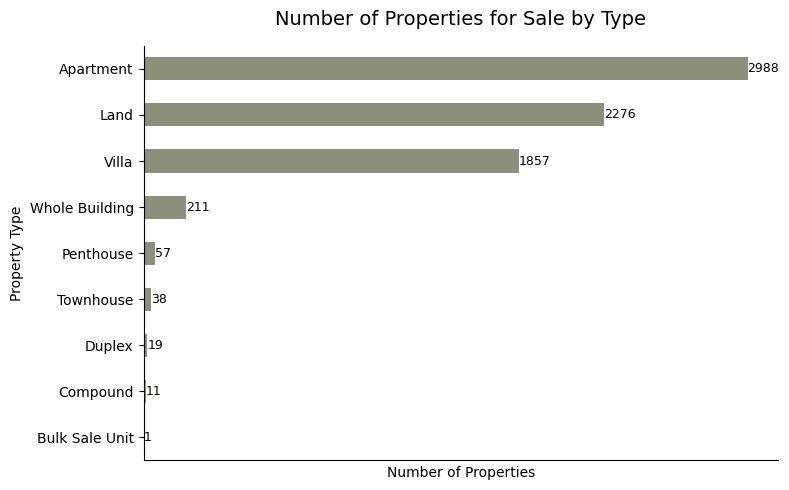

In [ ]:
from matplotlib import pyplot as plt

# Group and sort
prop_counts = buy.groupby('Property_type').size().sort_values(ascending=True)

# Plot
ax = prop_counts.plot(
    kind='barh',
    figsize=(8,5),
    color='#8c8f7b'
)

# Title
ax.set_title("Number of Properties for Sale by Type", fontsize=14, pad=15)

# Axis labels
ax.set_xlabel("Number of Properties")
ax.set_ylabel("Property Type")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=9)

# Remove number ticks, keep axis titles
ax.set_xticks([])
ax.tick_params(axis="x", bottom=False)

# Clean frame
ax.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()



In [ ]:
buy.to_csv('/content/drive/MyDrive/GA/Capstone_Project/scrapping/sale.csv', index=False)

In [ ]:
rent.to_csv('/content/drive/MyDrive/GA/Capstone_Project/scrapping/rental.csv', index=False)

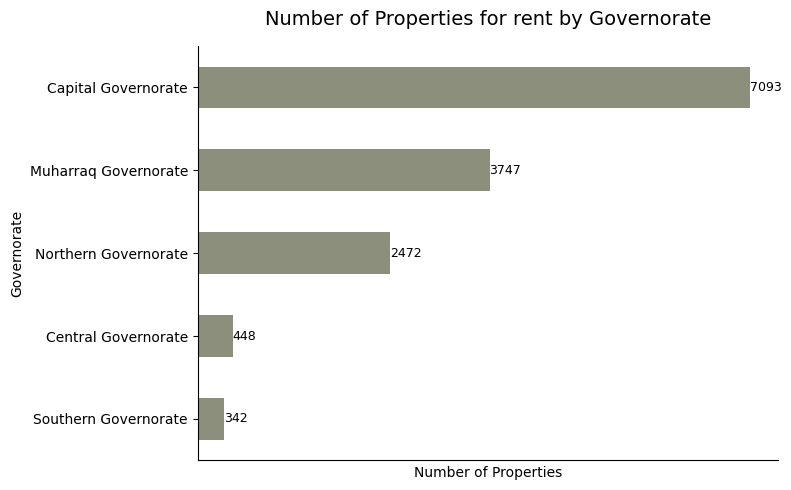

In [ ]:
import matplotlib.pyplot as plt

# Group and sort
gov_counts = rent.groupby('Governorate').size().sort_values(ascending=True)

# Plot (all same color, e.g. blue)
ax = gov_counts.plot(
    kind='barh',
    figsize=(8,5),
    color='#8c8f7b'   # pick any hex or named color
)

# Title
ax.set_title("Number of Properties for rent by Governorate", fontsize=14, pad=15)

# Axis labels
ax.set_xlabel("Number of Properties")
ax.set_ylabel("Governorate")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=9)

# Remove number ticks, keep axis titles
ax.set_xticks([])
ax.tick_params(axis="x", bottom=False)

# Clean frame
ax.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()



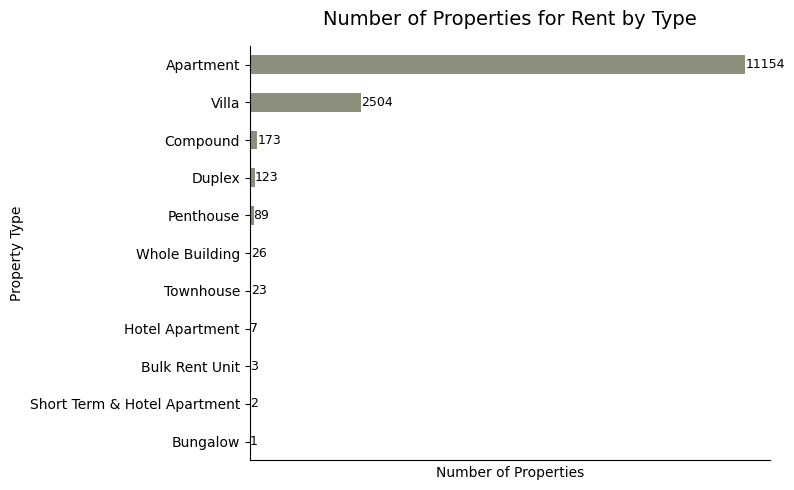

In [ ]:
from matplotlib import pyplot as plt

# Group and sort
prop_counts = rent.groupby('Property_type').size().sort_values(ascending=True)

# Plot
ax = prop_counts.plot(
    kind='barh',
    figsize=(8,5),
    color='#8c8f7b'
)

# Title
ax.set_title("Number of Properties for Rent by Type", fontsize=14, pad=15)

# Axis labels
ax.set_xlabel("Number of Properties")
ax.set_ylabel("Property Type")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=9)

# Remove number ticks, keep axis titles
ax.set_xticks([])
ax.tick_params(axis="x", bottom=False)

# Clean frame
ax.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
median_price = buy.groupby("Governorate")["Price"].median().reset_index()
print(median_price)

            Governorate   Price
0   Capital Governorate  83,600
1   Central Governorate 130,000
2  Muharraq Governorate 114,400
3  Northern Governorate 127,162
4  Southern Governorate 160,000


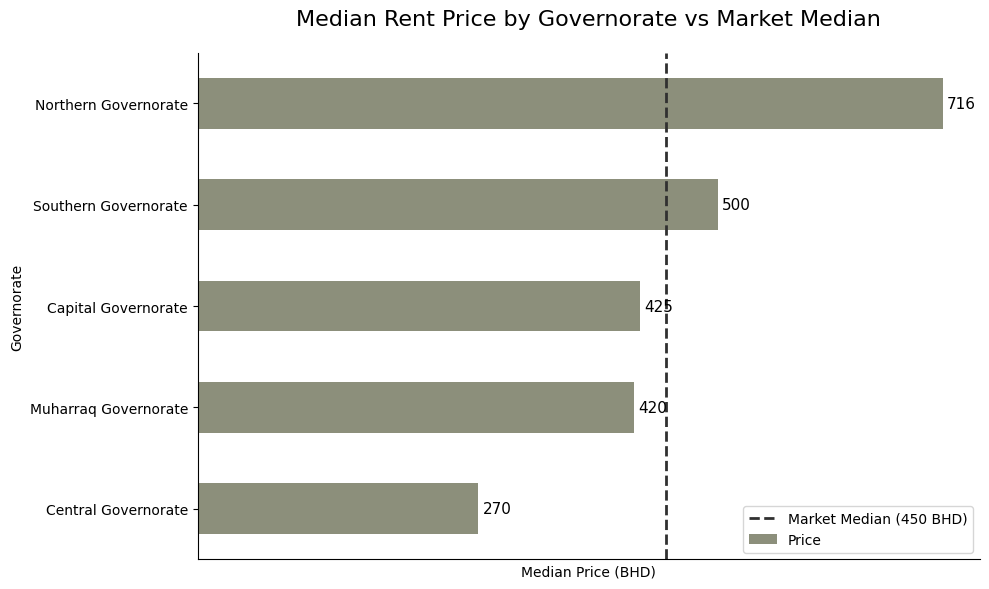

In [ ]:
median_price = rent.groupby("Governorate")["Price"].median().reset_index()

# Calculate overall median of all rent prices
overall_median = rent["Price"].median()

ax = median_price.sort_values("Price").plot(
    x="Governorate", y="Price",
    kind="barh", figsize=(10,6),
    color="#8c8f7b", legend=False
)

# Title & axis labels
ax.set_title("Median Rent Price by Governorate vs Market Median", fontsize=16, pad=20)
ax.set_xlabel("Median Price (BHD)")
ax.set_ylabel("Governorate")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=11, padding=3)

# Add vertical line at overall market median
ax.axvline(overall_median, color="#303030", linestyle="--", linewidth=2, label=f"Market Median ({overall_median:,.0f} BHD)")

# Remove tick numbers but keep axis titles
ax.set_xticks([])
ax.tick_params(axis="x", bottom=False)

# Clean frame
ax.spines[['top','right']].set_visible(False)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()





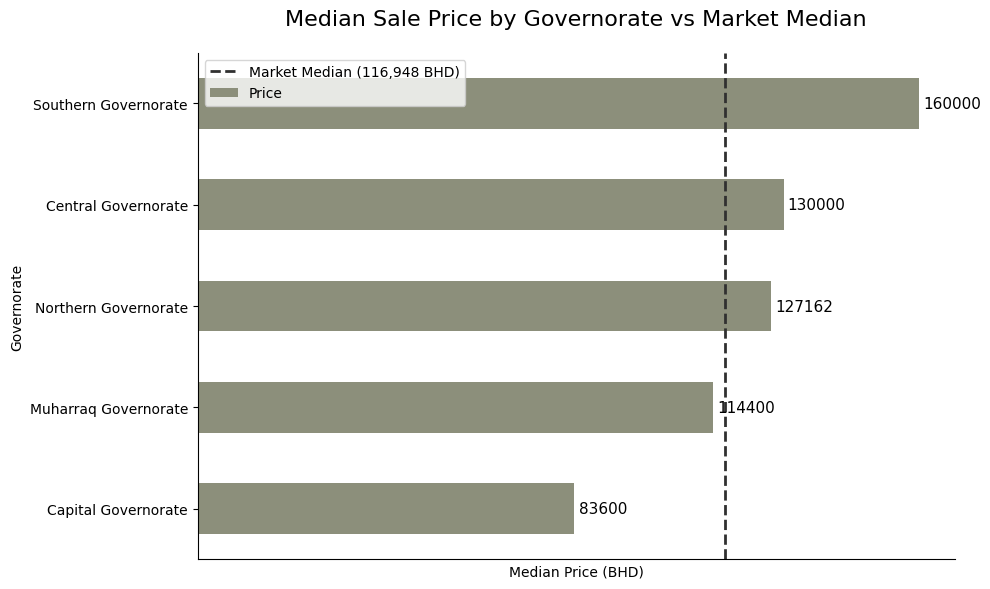

In [ ]:
median_price = buy.groupby("Governorate")["Price"].median().reset_index()

# Calculate overall median of all rent prices
overall_median = buy["Price"].median()

ax = median_price.sort_values("Price").plot(
    x="Governorate", y="Price",
    kind="barh", figsize=(10,6),
    color="#8c8f7b", legend=False
)

# Title & axis labels
ax.set_title("Median Sale Price by Governorate vs Market Median", fontsize=16, pad=20)
ax.set_xlabel("Median Price (BHD)")
ax.set_ylabel("Governorate")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=11, padding=3)

# Add vertical line at overall market median
ax.axvline(overall_median, color="#303030", linestyle="--", linewidth=2, label=f"Market Median ({overall_median:,.0f} BHD)")

# Remove tick numbers but keep axis titles
ax.set_xticks([])
ax.tick_params(axis="x", bottom=False)

# Clean frame
ax.spines[['top','right']].set_visible(False)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()
